# IMU Case

In [1]:
%load_ext autoreload
%autoreload 2

## 1. Load Processed Data

In [2]:
import pandas as pd, numpy as np, pickle as pkl

In [3]:
# Data Loading
train_df_aug = pd.read_csv("data/train_df_augmented.csv").drop(columns="Unnamed: 0")
test_df = pd.read_csv("data/test_df.csv").drop(columns="Unnamed: 0")

# train_df_aug = pd.read_csv("data/train_df_augmented_balanced_scaled.csv").drop(columns="Unnamed: 0")
# test_df = pd.read_csv("data/test_df_scaled.csv").drop(columns="Unnamed: 0")

with open('data/raw_data_dict.pkl', 'rb') as f:
    raw_data_dict = pkl.load(f)

acc = raw_data_dict['acc']
labels = raw_data_dict['labels']
win_ids = raw_data_dict['win_ids']
ts = raw_data_dict['ts']

In [4]:
train_df_aug

,mean_X,mean_Y,mean_Z,std_X,std_Y,std_Z,min_X,min_Y,min_Z,max_X,...,mean_mag,std_mag,dom_freq_X,dom_freq_Y,dom_freq_Z,corr_XY,corr_XZ,corr_YZ,label,ID
0,3.653800,9.810100,-0.478800,5.508084,3.914714,3.201477,-7.350000,2.370000,-7.040000,19.570000,...,11.927003,4.845368,0.19,0.10,0.10,0.316664,0.675447,0.011866,Walking,1
1,3.808700,9.892300,-0.687800,5.562401,4.293310,3.203771,-9.580000,2.370000,-8.050000,19.570000,...,12.115611,5.068116,0.19,0.10,0.24,0.301360,0.631326,-0.097338,Walking,1
2,3.923400,9.941400,-0.678300,5.903331,4.400147,3.365976,-9.580000,1.840000,-9.150000,19.570000,...,12.371288,5.213082,0.10,0.10,0.10,0.324586,0.576068,-0.020536,Walking,1
3,4.038600,10.126800,-0.533500,5.750473,4.382012,3.514250,-8.240000,1.730000,-9.150000,19.570000,...,12.569313,5.077330,0.10,0.10,0.10,0.270760,0.590267,0.013171,Walking,1
4,3.783000,9.999500,-0.590100,5.847101,4.675434,3.465680,-8.960000,1.330000,-8.310000,19.570000,...,12.434808,5.299440,0.10,0.10,0.10,0.350321,0.589238,0.004393,Walking,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59791,1.089477,9.615777,0.770682,1.154212,1.199843,0.968453,-1.603014,1.580709,-2.352693,4.660730,...,9.836152,1.097231,0.01,0.09,0.01,-0.327081,-0.387970,0.069817,Standing,30
59792,1.133960,9.500895,0.812632,1.210863,1.182951,1.003301,-1.574507,1.627186,-2.406378,4.859979,...,9.743457,1.072595,0.01,0.09,0.01,-0.332554,-0.395502,0.084277,Standing,30
59793,1.080300,9.634100,0.763200,1.153564,1.199537,0.942272,-1.500000,1.650000,-2.260000,4.630000,...,9.849933,1.096223,0.01,0.09,0.01,-0.332554,-0.395502,0.084277,Standing,30
59794,1.080300,9.634100,0.763200,1.153564,1.199537,0.942272,-1.500000,1.650000,-2.260000,4.630000,...,9.849933,1.096223,0.02,0.07,0.02,-0.332554,-0.395502,0.084277,Standing,30


In [5]:
test_df

,mean_X,mean_Y,mean_Z,std_X,std_Y,std_Z,min_X,min_Y,min_Z,max_X,...,mean_mag,std_mag,dom_freq_X,dom_freq_Y,dom_freq_Z,corr_XY,corr_XZ,corr_YZ,label,ID
0,-0.4560,9.6307,0.168100,2.461268,3.096822,2.716095,-7.89,3.57,-4.020000,5.33,...,10.235957,3.352177,0.09,0.09,0.09,0.368291,0.426440,0.332274,Walking,31
1,-0.5485,9.6015,0.114400,2.675363,3.377425,2.923732,-7.89,3.57,-4.210000,5.82,...,10.332625,3.585021,0.22,0.09,0.09,0.383674,0.318832,0.314332,Walking,31
2,-0.5188,9.6796,-0.110300,2.751854,3.345187,2.860913,-6.89,3.45,-4.210000,6.66,...,10.378082,3.635819,0.13,0.09,0.09,0.445817,0.302372,0.363934,Walking,31
3,-0.5117,9.8749,-0.192600,2.816652,3.284124,2.568084,-6.89,3.45,-4.020000,6.66,...,10.524214,3.516753,0.22,0.09,0.09,0.486903,0.373321,0.301481,Walking,31
4,-0.6909,9.7262,-0.065900,2.957356,3.385462,2.492614,-8.50,3.60,-3.490000,7.25,...,10.436195,3.547805,0.13,0.09,0.09,0.482041,0.330580,0.240695,Walking,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3784,-1.3264,9.4234,2.504510,0.101317,0.045546,0.064987,-1.53,9.34,2.369940,-1.08,...,9.841093,0.042740,0.02,0.02,0.01,0.315904,-0.071094,-0.127888,Standing,36
3785,-1.2796,9.4433,2.459971,0.098843,0.047033,0.057943,-1.50,9.30,2.342700,-1.08,...,9.842642,0.049772,0.01,0.14,0.02,0.107484,-0.003434,0.144373,Standing,36
3786,-1.3304,9.4261,2.491843,0.113463,0.062800,0.079218,-1.69,9.28,2.342700,-1.14,...,9.841247,0.059607,0.03,0.01,0.01,0.307973,-0.523127,-0.188623,Standing,36
3787,-1.3643,9.4271,2.463648,0.137595,0.083490,0.119740,-1.73,9.23,2.152015,-1.04,...,9.840421,0.086258,0.02,0.02,0.01,0.122436,-0.241409,-0.019276,Standing,36


In [6]:
# Separate features and labels
X_train, y_train= train_df_aug.drop(columns=['label','ID']), train_df_aug['label']
X_test, y_test  = test_df.drop(columns=['label','ID']), test_df['label']
print("Labeled (augmented) train windows:", y_train.notna().sum(),
      "| Unlabeled train windows:", y_train.isna().sum())
print("Labeled test windows:", y_test.notna().sum(),
      "| Unlabeled test windows:", y_test.isna().sum())

Labeled (augmented) train windows: 51624 | Unlabeled train windows: 8172
Labeled test windows: 2053 | Unlabeled test windows: 1736


In [7]:
# Encode labels
label_encoder = {lab: i for i, lab in enumerate(sorted(y_train[y_train.notna()].unique()))}
inverse_label_encoder = {v: k for k, v in label_encoder.items()}

In [8]:
# Standardization
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit on training data and transform both train and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

## 2. Classification + Auto-labeling (confidence filtering)

In [9]:
from utilities import  train_classifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

CONF_THRESHOL = 0.75
N_ESTIMATORS = 400

lr_cls, _, _, lr_test_acc_history, lr_f1_wtd_history, lr_newly_labeled_counts, _ = train_classifier(
    LogisticRegression, X_train_scaled, y_train, X_test_scaled, y_test, CONF_THRESHOL
)

rf_cls, _, _, rf_test_acc_history, rf_f1_wtd_history, rf_newly_labeled_counts, _ = train_classifier(
    RandomForestClassifier, X_train_scaled, y_train, X_test_scaled, y_test, CONF_THRESHOL, N_ESTIMATORS
)

xgb_cls, _, _, xgb_test_acc_history, xgb_f1_wtd_history, xgb_newly_labeled_counts, y_train_new = train_classifier(
    XGBClassifier, X_train_scaled, y_train, X_test_scaled, y_test, CONF_THRESHOL, N_ESTIMATORS
)

models = [lr_cls, rf_cls, xgb_cls]


-------- Training LogisticRegression model --------

Iteration 1


/home_as/shared/arbeitsgruppen/flowsim/dependencies/RHEL8/2022.06.0/linux-rhel8-haswell/gcc-11.3.0/py-scikit-learn-1.0.1-72r4tcjwohltlr33uxehss6bdz4thm3a/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Test | Balanced Accuracy: 0.7624 | Weighted F1 Score: 0.8585
Labeled 5696/8172 samples using confidence filtering (conf >= 0.75)

Iteration 2


/home_as/shared/arbeitsgruppen/flowsim/dependencies/RHEL8/2022.06.0/linux-rhel8-haswell/gcc-11.3.0/py-scikit-learn-1.0.1-72r4tcjwohltlr33uxehss6bdz4thm3a/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Test | Balanced Accuracy: 0.7619 | Weighted F1 Score: 0.8594
Labeled 100/2476 samples using confidence filtering (conf >= 0.75)

Iteration 3


/home_as/shared/arbeitsgruppen/flowsim/dependencies/RHEL8/2022.06.0/linux-rhel8-haswell/gcc-11.3.0/py-scikit-learn-1.0.1-72r4tcjwohltlr33uxehss6bdz4thm3a/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Test | Balanced Accuracy: 0.7614 | Weighted F1 Score: 0.8593
Labeled 5/2376 samples using confidence filtering (conf >= 0.75)

Iteration 4


/home_as/shared/arbeitsgruppen/flowsim/dependencies/RHEL8/2022.06.0/linux-rhel8-haswell/gcc-11.3.0/py-scikit-learn-1.0.1-72r4tcjwohltlr33uxehss6bdz4thm3a/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Test | Balanced Accuracy: 0.7614 | Weighted F1 Score: 0.8593
No high-confidence predictions this iteration
Remaining unlabeled window samples = 2371

Final LogisticRegression model trained on 57425 samples.

-------- Training RandomForestClassifier model --------

Iteration 1
Test | Balanced Accuracy: 0.8070 | Weighted F1 Score: 0.8797
Labeled 6899/8172 samples using confidence filtering (conf >= 0.75)

Iteration 2
Test | Balanced Accuracy: 0.8169 | Weighted F1 Score: 0.8861
Labeled 106/1273 samples using confidence filtering (conf >= 0.75)

Iteration 3
Test | Balanced Accuracy: 0.8114 | Weighted F1 Score: 0.8831
Labeled 34/1167 samples using confidence filtering (conf >= 0.75)

Iteration 4
Test | Balanced Accuracy: 0.8135 | Weighted F1 Score: 0.8822
Labeled 22/1133 samples using confidence filtering (conf >= 0.75)

Iteration 5
Test | Balanced Accuracy: 0.8175 | Weighted F1 Score: 0.8862
Labeled 18/1111 samples using confidence filtering (conf >= 0.75)

Iteration 6
Test | Balanced Accu

## 3. Performance of Classification

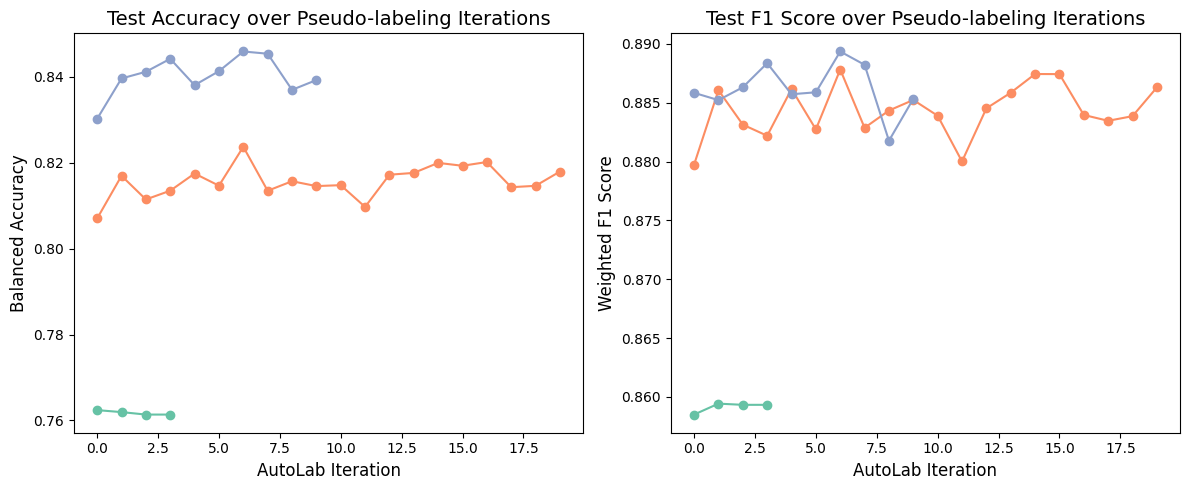

In [10]:
import matplotlib.pyplot as plt, seaborn as sns
colors = sns.color_palette("Set2", 3)

# Create figure
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5), sharex=True)

# --- Accuracy Plot ---
axes[0].plot(lr_test_acc_history, marker='o', label="Logistic Regression", color=colors[0])
axes[0].plot(rf_test_acc_history, marker='o', label="Random Forest", color=colors[1])
axes[0].plot(xgb_test_acc_history, marker='o', label="XGBoost", color=colors[2])

axes[0].set_title("Test Accuracy over Pseudo-labeling Iterations", fontsize=14)
axes[0].set_xlabel("AutoLab Iteration", fontsize=12)
axes[0].set_ylabel("Balanced Accuracy", fontsize=12)

# --- Weighted F1 Plot ---
axes[1].plot(lr_f1_wtd_history, marker='o', label="Logistic Regression", color=colors[0])
axes[1].plot(rf_f1_wtd_history, marker='o', label="Random Forest", color=colors[1])
axes[1].plot(xgb_f1_wtd_history, marker='o', label="XGBoost", color=colors[2])

axes[1].set_title("Test F1 Score over Pseudo-labeling Iterations", fontsize=14)
axes[1].set_xlabel("AutoLab Iteration", fontsize=12)
axes[1].set_ylabel("Weighted F1 Score", fontsize=12)
plt.tight_layout()
plt.savefig("images/Classifier_Performance_Over_Iterations.png", dpi=300)

In [11]:
# Evaluation on test set - only on windows that have an actual label
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import classification_report

for model in models:
      print(f"\n-------- {type(model).__name__} --------\n")
      test_mask = y_test.notna()
      X_test_eval = X_test_scaled[test_mask]
      y_test_eval = y_test[test_mask]
      y_test_enc = y_test_eval.map(label_encoder)

      y_pred_enc = model.predict(X_test_eval)
      y_pred_labels = [list(label_encoder.keys())[i] for i in y_pred_enc]

      print("Test Classification Report (for labeled test data):")
      print(classification_report(y_test_eval, y_pred_labels))

      bal_acc = balanced_accuracy_score(y_test_eval, y_pred_labels)
      print(f"Balanced Accuracy: {bal_acc:.4f}")


-------- LogisticRegression --------

Test Classification Report (for labeled test data):
              precision    recall  f1-score   support

  Downstairs       0.72      0.50      0.59       169
     Jogging       0.97      0.93      0.95       643
     Sitting       0.78      1.00      0.88       140
    Standing       0.95      0.57      0.71        92
    Upstairs       0.79      0.60      0.69       200
     Walking       0.84      0.97      0.90       809

    accuracy                           0.87      2053
   macro avg       0.84      0.76      0.79      2053
weighted avg       0.87      0.87      0.86      2053

Balanced Accuracy: 0.7614

-------- RandomForestClassifier --------

Test Classification Report (for labeled test data):
              precision    recall  f1-score   support

  Downstairs       0.63      0.59      0.61       169
     Jogging       1.00      0.96      0.98       643
     Sitting       0.82      1.00      0.90       140
    Standing       1.00     

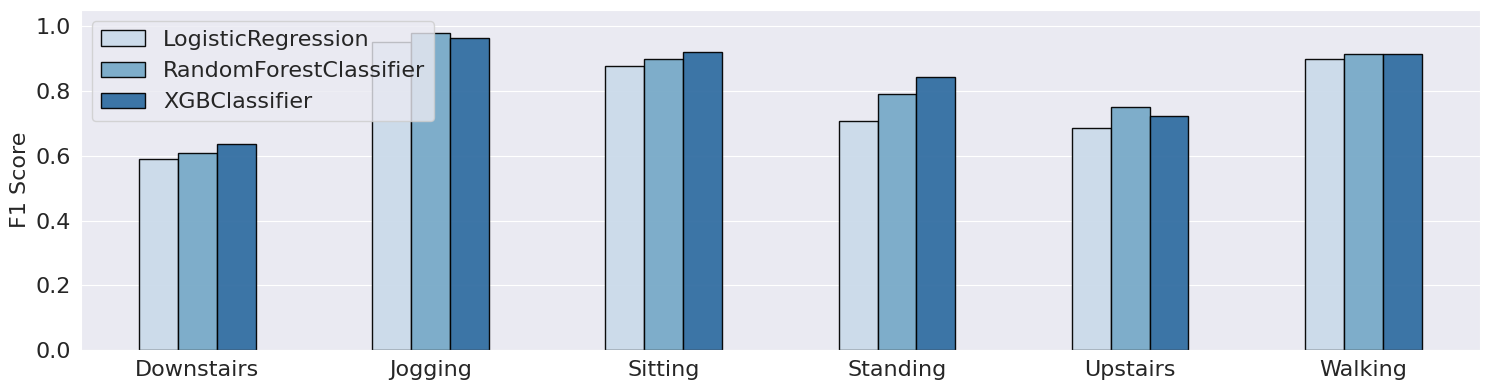

In [12]:
# Collect per-class F1 scores
import matplotlib.pyplot as plt, seaborn as sns
sns.set_style("darkgrid")

f1_records = []

for model in models:
    model_name = type(model).__name__

    test_mask = y_test.notna()
    X_test_eval = X_test_scaled[test_mask]
    y_test_eval = y_test[test_mask]
    y_test_enc = y_test_eval.map(label_encoder)

    y_pred_enc = model.predict(X_test_eval)
    y_pred_labels = [list(label_encoder.keys())[i] for i in y_pred_enc]

    report = classification_report(y_test_eval, y_pred_labels, output_dict=True)

    for label in label_encoder.keys():
        if label in report:
            f1_records.append({
                "Model": model_name,
                "Label": label,
                "F1 Score": report[label]["f1-score"]
            })

# Create DataFrame
f1_df = pd.DataFrame(f1_records)

# Plot
plt.figure(figsize=(15, 4))
sns.barplot(data=f1_df, x="Label", y="F1 Score", hue="Model", width=0.5, edgecolor="black", alpha=0.95, palette='Blues')
plt.ylabel("F1 Score", fontsize=16); plt.xlabel("")
plt.xticks(fontsize=16); plt.yticks(fontsize=16)
plt.ylim(0, 1.05)
plt.legend(fontsize=16)
plt.tight_layout()
plt.savefig("images/F1_Score_PerClass_PerModel.png", dpi=300)

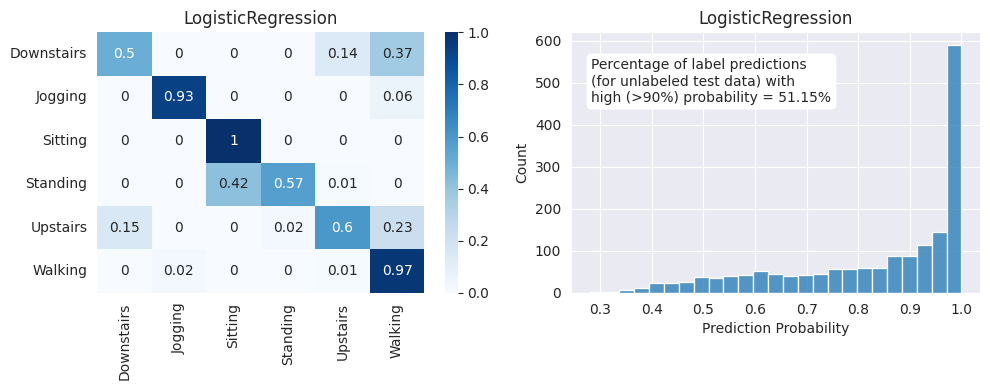

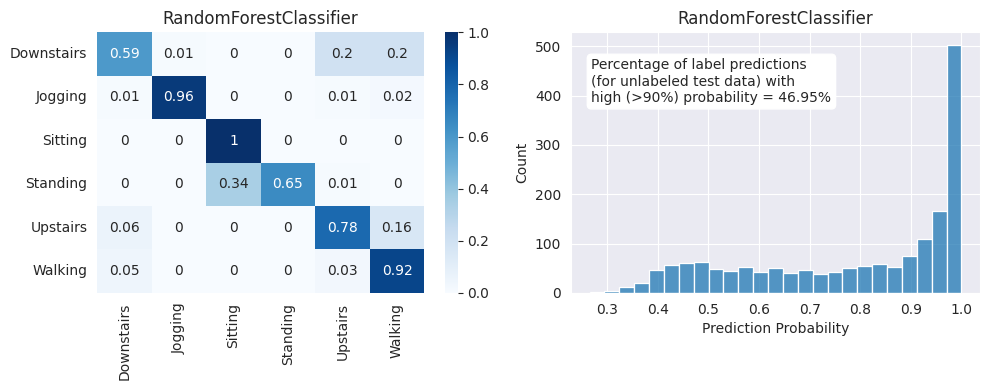

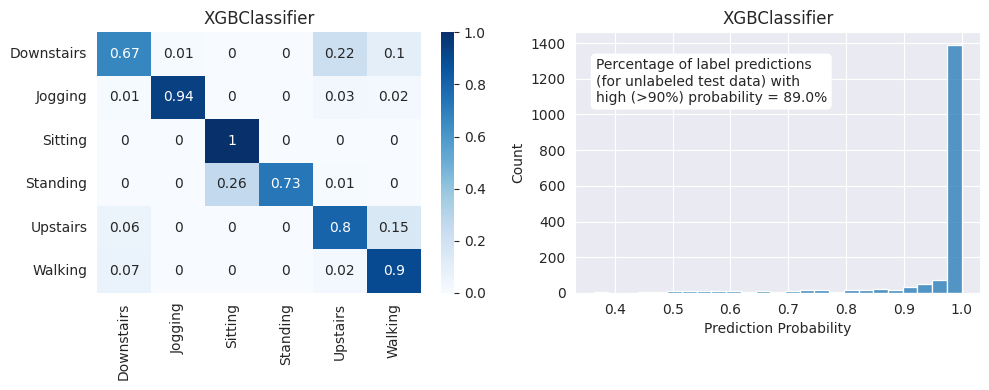

In [13]:
from sklearn.metrics import confusion_matrix

for model in models:
    test_mask = y_test.notna()
    X_test_eval = X_test_scaled[test_mask]
    y_test_eval = y_test[test_mask]
    y_pred_enc = model.predict(X_test_eval)
    y_pred_labels = [list(label_encoder.keys())[i] for i in y_pred_enc]

    labels_order = list(label_encoder.keys())
    cm = confusion_matrix(y_test_eval, y_pred_labels, labels=labels_order)
    cm = np.round((cm.T / cm.sum(axis=1)).T , 2)

    # Evaluation on test set - only on windows that have no actual label
    test_mask = y_test.isna()
    X_test_isna_eval = X_test_scaled[test_mask]

    y_test_isna_pred_enc = model.predict(X_test_isna_eval)
    y_test_isna_pred_prob = model.predict_proba(X_test_isna_eval)
    y_test_isna_pred_labels = [list(label_encoder.keys())[i] for i in y_test_isna_pred_enc]
    y_test_isna_gt90pcnt_conf = (y_test_isna_pred_prob >= 0.9).sum() / len(y_test_isna_pred_prob)

    prob_test = f"Percentage of label predictions \n(for unlabeled test data) with\n" + \
        f"high (>90%) probability = {round(y_test_isna_gt90pcnt_conf * 100, 2)}%"

    fig, ax = plt.subplots(ncols=2, figsize=(10,4))
    sns.heatmap(
        data=pd.DataFrame(cm, columns=label_encoder),
        ax=ax[0], cmap="Blues", annot=True, yticklabels=labels_order,
    )
    ax[0].set_title(f'{type(model).__name__}')
    sns.histplot(y_test_isna_pred_prob.max(axis=1), ax=ax[1], bins=25)
    # ax[1].set_ylim(0, 1500)
    ax[1].text(
        0.05, 0.9, prob_test, transform=ax[1].transAxes, fontsize=10, verticalalignment='top',
        bbox=dict(facecolor='white', edgecolor="white", boxstyle='round,pad=0.3')
    )
    ax[1].set_title(f'{type(model).__name__}')
    ax[1].set_xlabel('Prediction Probability')

    plt.tight_layout()
    plt.savefig(f"images/ConfMat_PredProb_{type(model).__name__}.png", dpi=300)

## 4. Performance of Auto-labeling

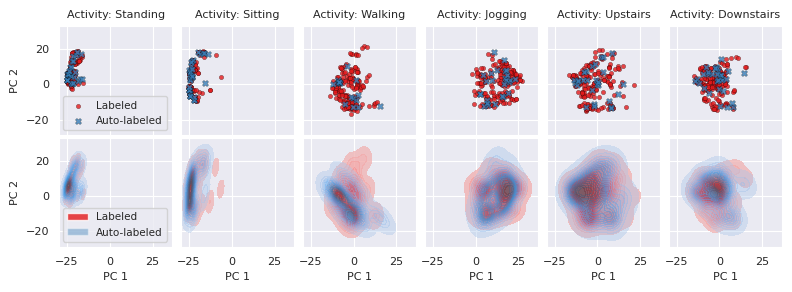

In [14]:
# PCA Projection of Labeled vs Auto-Labeled Samples
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

plot_kind = ['KDE', 'Scatter'][0]
min_samples = 200
palette = 'Set1'

# Prepare combined DataFrame
df_vis = X_train.copy()
df_vis['label'] = y_train_new
df_vis['Label Source'] = ['Labeled' if not pd.isna(orig) else 'Auto-labeled' for orig in y_train]
df_vis = df_vis[df_vis['label'].notna()]

# PCA
features_only = df_vis.drop(columns=['label', 'Label Source'])
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features_only)
df_vis['PCA1'] = pca_result[:, 0]
df_vis['PCA2'] = pca_result[:, 1]

# Get unique activity labels
activity_labels = sorted(df_vis['label'].unique())

# Create 2-row, 6-column plot
fig, axes = plt.subplots(nrows=2, ncols=6, figsize=(8, 3), sharex=True, sharey=True)
axes = axes.flatten()

# Hold legend handles
scatter_handles, kde_handles = None, None

marker_dict = {'Labeled': 'o', 'Auto-labeled': 'd'}

# for i, label in enumerate(activity_labels):
for i, label in enumerate(['Standing', 'Sitting', 'Walking', 'Jogging', 'Upstairs', 'Downstairs']):

    ax_scatter = axes[i]
    ax_kde = axes[i + 6]

    subset = df_vis[df_vis['label'] == label].sample(n=min(min_samples, df_vis[df_vis['label'] == label].shape[0]), random_state=0)

    # # Scatter plot
    source_styles = {
        'Labeled': {'marker': 'o', 'size': 10, 'color': sns.color_palette(palette)[0], 'alpha': 0.8},
        'Auto-labeled': {'marker': 'X', 'size': 20, 'color': sns.color_palette(palette)[1], 'alpha': 0.8}
    }
    for source, style in source_styles.items():
        subset_src = subset[subset['Label Source'] == source]
        ax_scatter.scatter(
            subset_src['PCA1'], subset_src['PCA2'],
            label=source if i == 0 else None,
            marker=style['marker'],
            s=style['size'],
            color=style['color'],
            alpha=style['alpha'],
            edgecolors='k',
            linewidths=0.2
        )
    if i == 0: ax_scatter.legend(loc='lower right', fontsize=7.5)

    # # KDE plot
    source_styles = {
        'Labeled': {'marker': 'o', 'size': 20, 'color': sns.color_palette(palette)[0], 'alpha': 0.8},
        'Auto-labeled': {'marker': 'X', 'size': 40, 'color': sns.color_palette(palette)[1], 'alpha': 0.4}
    }
    for source, style in source_styles.items():
        subset_src = subset[subset['Label Source'] == source]
        if len(subset_src) > 10:  # KDE needs enough points
            sns.kdeplot(
                data=subset_src,
                x='PCA1', y='PCA2',
                ax=ax_kde, fill=True,
                levels=20, thresh=0.01,
                color=style['color'],
                alpha=style['alpha'],
            )
    if i == 0:
        from matplotlib.patches import Patch
        legend_elements = [
            Patch(facecolor=style['color'], label=source, alpha=0.8 if source == 'Labeled' else 0.4)
            for source, style in source_styles.items()
        ]
        ax_kde.legend(handles=legend_elements, loc='lower right', fontsize=7.5)

    # Titles and labels
    ax_scatter.set_title(f"Activity: {label}", fontsize=8)
    for ax in [ax_scatter, ax_kde]:
        if ax == ax_kde: ax.set_xlabel("PC 1", fontsize=8)
        if i==0: ax.set_ylabel("PC 2", fontsize=8)
        ax.tick_params(axis='both', which='major', labelsize=8)

plt.tight_layout(pad=1.0, w_pad=0.2, h_pad=0.2)
plt.savefig("images/PCA_Labeled_vs_AutoLabeled.png", dpi=300)